In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("data/BATADAL_dataset03.csv")
valid_data = pd.read_csv("data/BATADAL_dataset04.csv")
test_data = pd.read_csv("data/BATADAL_test_dataset.csv")

In [3]:
train_data["DATETIME"] = pd.to_datetime(train_data.DATETIME)
valid_data["DATETIME"] = pd.to_datetime(valid_data.DATETIME)
test_data["DATETIME"] = pd.to_datetime(test_data.DATETIME)

In [4]:
# remove leading space in the columns
valid_data.columns = valid_data.columns.str.strip()

In [5]:
X_train = train_data[set(train_data.columns)-{"ATT_FLAG", "DATETIME"}].to_numpy()
X_valid = valid_data[set(valid_data.columns)-{"ATT_FLAG", "DATETIME"}].to_numpy()
y_valid = valid_data["ATT_FLAG"].to_numpy()
# convert to 1s for attack and 0s for normal
y_valid = y_valid == 1
# X_test = test_data[set(test_data.columns)-{"ATT_FLAG"}]
# y_test = test_data["ATT_FLAG"]

In [6]:
import datetime
test_data['ATT_FLAG'] = pd.Series(np.zeros(test_data.shape[0])) # default 0 (no-attack)

# start setting values
attack_times = [
    [pd.Timestamp("2017-01-16T09"), pd.Timestamp("2017-01-19T06")],
    [pd.Timestamp("2017-01-30T08"), pd.Timestamp("2017-02-02T00")],
    [pd.Timestamp("2017-02-09T03"), pd.Timestamp("2017-02-10T09")],
    [pd.Timestamp("2017-02-12T01"), pd.Timestamp("2017-02-13T07")],
    [pd.Timestamp("2017-02-24T05"), pd.Timestamp("2017-02-28T08")],
    [pd.Timestamp("2017-03-10T14"), pd.Timestamp("2017-03-13T21")],
    [pd.Timestamp("2017-03-25T20"), pd.Timestamp("2017-03-27T01")]
]

# showing how distribution of 0s and 1s changes
print(test_data['ATT_FLAG'].value_counts(normalize=True))
for times in attack_times:
    indexes = np.where(test_data['DATETIME'].between(times[0], times[1], inclusive=True))[0]
    test_data['ATT_FLAG'][indexes] = 1 # set 1 (attack)
    print(test_data['ATT_FLAG'].value_counts(normalize=True))

0.0    1.0
Name: ATT_FLAG, dtype: float64
0.0    0.966491
1.0    0.033509
Name: ATT_FLAG, dtype: float64
0.0    0.946865
1.0    0.053135
Name: ATT_FLAG, dtype: float64
0.0    0.946865
1.0    0.053135
Name: ATT_FLAG, dtype: float64
0.0    0.943035
1.0    0.056965
Name: ATT_FLAG, dtype: float64
0.0    0.895165
1.0    0.104835
Name: ATT_FLAG, dtype: float64
0.0    0.884634
1.0    0.115366
Name: ATT_FLAG, dtype: float64
0.0    0.870273
1.0    0.129727
Name: ATT_FLAG, dtype: float64


<ipython-input-6-7e858ae7d543>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ATT_FLAG'][indexes] = 1 # set 1 (attack)


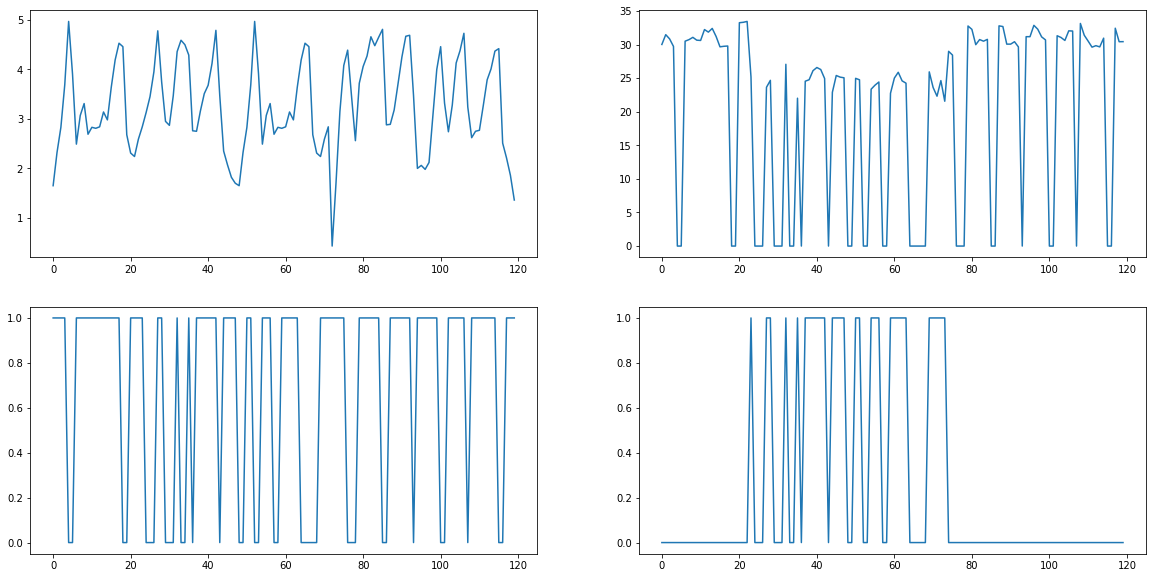

In [171]:
signals = ["L_T7", "F_PU10", "S_PU10", "S_PU11"]
fig, axs = plt.subplots(2, 2)
fig.set_size_inches((20,10))

attack_1[signals[0]].plot(ax=axs[0, 0])
# axs[0, 0].scatter(x=, y=)
# attack_1.plot.scatter(x="index", y="", ax=axs[0, 0])
attack_1[signals[1]].plot(ax=axs[0, 1])
attack_1[signals[2]].plot(ax=axs[1, 0])
attack_1[signals[3]].plot(ax=axs[1, 1])

The observations in a stationary time series are not dependent on time. Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations. We can see that these signals are all stationary since they do not have an obvious trend. We can even do a test called the Augmented Dickey-Fuller test that can inform us about the degree to which this data is stationary.

The ADF test is a statistical test with the following hypotheses

**Null Hypothesis (H0):** If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
**Alternate Hypothesis (H1):** The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

In [8]:
from statsmodels.tsa.stattools import adfuller

In [28]:
# series = read_csv('daily-total-female-births.csv', header=0, index_col=0, squeeze=True)
# X = series.values
result = adfuller(train_data["L_T7"])
print("S_PU10")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
print("---------------------")

S_PU10
ADF Statistic: -17.489711
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
---------------------


We can see that our statistic values of -20, -27, -16 are less than their corresponding critical values at 1%. This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke). One interesting case is S_PU1 which is constant at 0 and hence the ADF statistic is not defined.

From the above tests we can conclude that all the chosen signals are stationary and we do not need differencing.

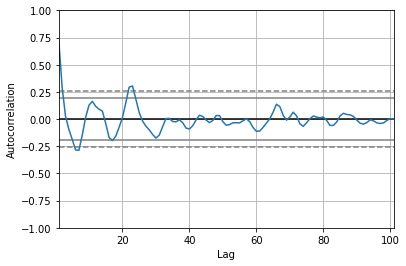

In [40]:
pd.plotting.autocorrelation_plot(train_data["L_T7"].loc[:100])

In [17]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

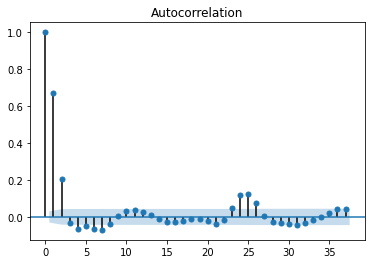

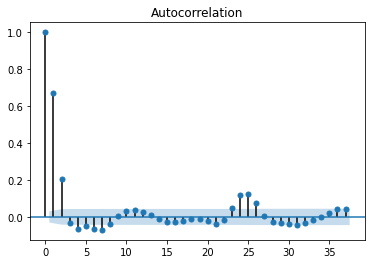

In [41]:
plot_acf(valid_data["L_T7"])

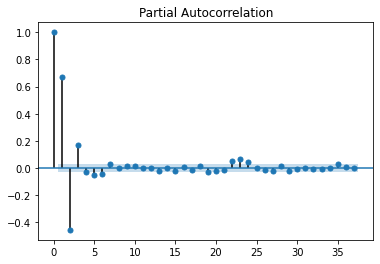

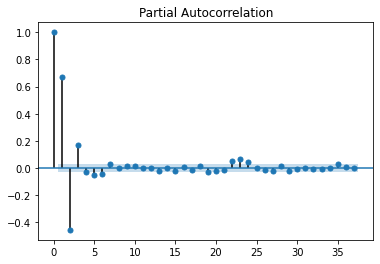

In [42]:
plot_pacf(valid_data["L_T7"])

                              ARMA Model Results                              
Dep. Variable:                   L_T7   No. Observations:                 8761
Model:                     ARMA(2, 3)   Log Likelihood               -7034.026
Method:                       css-mle   S.D. of innovations              0.540
Date:                Tue, 26 May 2020   AIC                          14082.052
Time:                        20:15:54   BIC                          14131.599
Sample:                             0   HQIC                         14098.934
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3025      0.013    262.963      0.000       3.278       3.327
ar.L1.L_T7     0.9479      0.111      8.515      0.000       0.730       1.166
ar.L2.L_T7    -0.2676      0.020    -13.059      0.0

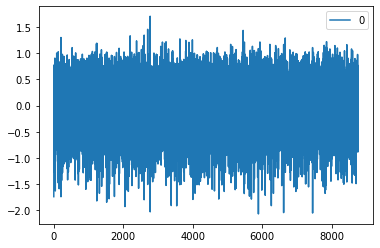

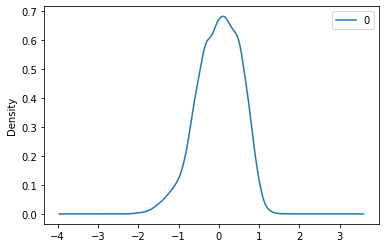

                 0
count  8761.000000
mean     -0.000021
std       0.540251
min      -2.069276
25%      -0.362245
50%       0.031854
75%       0.409381
max       1.704490


In [83]:
model = ARIMA(train_data["L_T7"], order=(2,0,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [64]:
from tqdm import tqdm

In [84]:
from sklearn.metrics import mean_squared_error

train_X, test_X = train_data["L_T7"].to_numpy(), test_data["L_T7"].to_numpy()[:500]
test_y = test_data["ATT_FLAG"].to_numpy()[:500]
history = [x for x in train]
predictions = list()
for t in tqdm(range(len(test))):
#     print(t)
    model = ARIMA(history, order=(2, 0, 3))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

 29%|██▉       | 144/500 [09:24<23:16,  3.92s/it]


KeyboardInterrupt: 

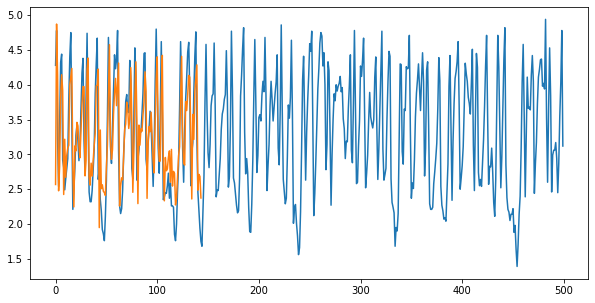

In [85]:
plt.figure(figsize=(10, 5))
plt.plot(test)
plt.plot(predictions)
plt.show()

In [86]:
import numpy as np
def detect_classify_anomalies(df,window):
    df.replace([np.inf, -np.inf], np.NaN, inplace=True)
    df.fillna(0,inplace=True)
    df['error']=df['actuals']-df['predicted']
    df['percentage_change'] = ((df['actuals'] - df['predicted']) / df['actuals']) * 100
    df['meanval'] = df['error'].rolling(window=window).mean()
    df['deviation'] = df['error'].rolling(window=window).std()
    df['-3s'] = df['meanval'] - (2 * df['deviation'])
    df['3s'] = df['meanval'] + (2 * df['deviation'])
    df['-2s'] = df['meanval'] - (1.75 * df['deviation'])
    df['2s'] = df['meanval'] + (1.75 * df['deviation'])
    df['-1s'] = df['meanval'] - (1.5 * df['deviation'])
    df['1s'] = df['meanval'] + (1.5 * df['deviation'])
    cut_list = df[['error', '-3s', '-2s', '-1s', 'meanval', '1s', '2s', '3s']]
    cut_values = cut_list.values
    cut_sort = np.sort(cut_values)
    df['impact'] = [(lambda x: np.where(cut_sort == df['error'][x])[1][0])(x) for x in
                               range(len(df['error']))]
    severity = {0: 3, 1: 2, 2: 1, 3: 0, 4: 0, 5: 1, 6: 2, 7: 3}
    region = {0: "NEGATIVE", 1: "NEGATIVE", 2: "NEGATIVE", 3: "NEGATIVE", 4: "POSITIVE", 5: "POSITIVE", 6: "POSITIVE",
              7: "POSITIVE"}
    df['color'] =  df['impact'].map(severity)
    df['region'] = df['impact'].map(region)
    df['anomaly_points'] = np.where(df['color'] == 3, df['error'], np.nan)
    return df

In [87]:
predicted_df=pd.DataFrame()
predicted_df['actuals']=test[:144]
predicted_df['predicted']=np.array(predictions[:144]).flatten()
predicted_df.reset_index(inplace=True)
del predicted_df['index']

In [88]:
classify_df=detect_classify_anomalies(predicted_df,24)

In [89]:
y_pred = (~classify_df["anomaly_points"].isnull()).to_numpy().astype(int)

In [92]:
test_y[:144]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [91]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

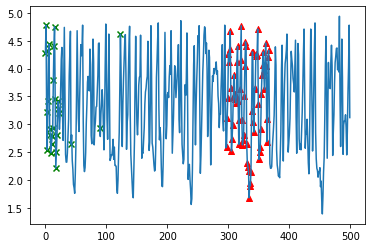

In [113]:
plt.plot(test)
plt.scatter(x=test_data.iloc[np.argwhere(test_y==1).flatten()].index.to_numpy(),
            y=test_data.iloc[np.argwhere(test_y==1).flatten()].L_T7.to_numpy(), marker="^", color="r")
plt.scatter(x=test_data.iloc[np.argwhere(y_pred==1).flatten()].index.to_numpy(),
            y=test_data.iloc[np.argwhere(y_pred==1).flatten()].L_T7.to_numpy(), marker="x", color="g")

297    2.60
298    3.12
299    3.48
300    4.27
301    4.12
       ... 
362    4.04
363    2.69
364    3.09
365    4.21
366    4.33
Name: L_T7, Length: 70, dtype: float64